In [62]:
'''
    比较由探空气球测量的得到的大气温度数据和微波辐射计反演得到的大气温度数据之间的差异
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import draw_photo_module
from scipy.optimize import curve_fit

# --------------------------------------------
filepath_1 = r'I:\Data\Personal Data\graduation project\SACOL\original_data\200712\sounding_data_as_MWR_format_200712.txt'
filepath_2 = r'I:\Data\Personal Data\graduation project\SACOL\microwave\2007\200712\2007-12-02_Time0730.csv'

In [63]:
# 世界时
# 探空气球数据
data_1 = pd.read_csv(filepath_1,sep='  ')
# O_data_1 = data_1.iloc[1:2,0:48]
EL = 2007120200
O_data_1 = data_1.loc[data_1['Time']==EL]

In [64]:
# 北京时 = 世界时 + 8
# 微波辐射计数据
data_2 = pd.read_csv(filepath_2)
O_data_2 = data_2.iloc[60:61]
# parameter = 11
# a = data_2.loc[data_2['10']==parameter]
# Del_columns = data_2.columns[2:10]
# a.drop(Del_columns,axis=1,inplace=True)
# a.drop('Record',axis=1,inplace=True)
# z = a.iloc[:,0:48]
# O_data_2 = z.loc[z['Date/Time']=='12/02/07 08:00:19']

In [65]:
O_data_2.columns = O_data_1.columns
data = O_data_2
data = data.append(O_data_1)
photoname = 'WorldTime' + str(EL)

In [66]:
# 计算两种数据源的拟合度
# 以探空气球得到的数据为基准

In [67]:
def draw_Linechart_photo(data,photoname):
    plt.rcParams['figure.figsize'] = (10.0,20.0)
    #纵轴上分布高度数值
    Height = data.columns.values[1:48]
    # 绘图
    Len = len(data['Time'])
    i = 0
    while i<Len:
        data_for_print = np.array(data.iloc[i:i+1,1:48]).T
        plt.plot(data_for_print, Height, label=data['Time'][i:i+1].values)
        i = i+1
    #设置X轴
    x_ticks = np.linspace(180, 320, 8)
    plt.xticks(x_ticks,rotation=45)
    # 启动图例
    plt.legend()
    # 添加网格
    plt.grid()
    # 主标题
    plt.title(photoname,fontsize=20,fontweight='bold')
    # 保存图片
    photopath = 'G:/python/work for graduation/photo/' + photoname + '.png'
    print(photopath)
    plt.savefig(photopath,bbox_inches = 'tight')
    # 展示图片
    plt.show()

G:/python/work for graduation/photo/WorldTime2007120200.png


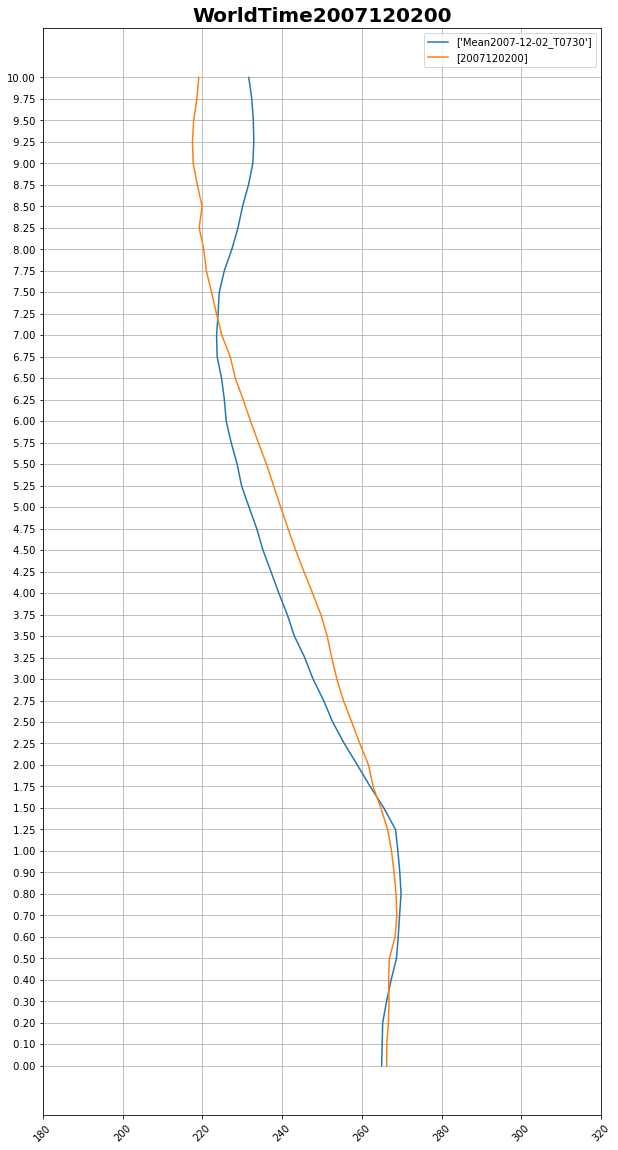

In [68]:
# 可视化比较
draw_Linechart_photo(data,photoname)

In [69]:
# plt.rcParams['figure.figsize'] = (10.0,20.0)
# Height = data.columns.values[1:48]
# Len = len(data['Time'])
# i = 0
# while i<Len:
#     print_data = np.array(data.iloc[i:i+1,1:48]).T
#     plt.plot(print_data,Height,label=data['Time'][i:i+1].values)
#     i = i+1
# x_ticks = np.linspace(180, 320, 8)
# plt.xticks(x_ticks,rotation=45)
# # 启动图例
# plt.legend()
# # 添加网格
# plt.grid()
# # 主标题
# plt.title(photoname,fontsize=20,fontweight='bold')
# # 保存图片
# plt.savefig(photoname,bbox_inches = 'tight')
# # 展示图片
# plt.show()